In [1]:
import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = r'C:\Users\Administrator\Documents\training\Data\p_cars_data\cars.data'

df_m = pd.read_csv(filepath)
df_m.head()

,Make and Model,Mileage,Price
0,2015 GMC Sierra 1500 SLT,"74,281 mi.","$31,149"
1,2013 Toyota Prius Two,"114,152 mi.","$10,995"
2,2017 Toyota Tacoma TRD Off Road,"22,013 mi.","$31,995"
3,2019 Subaru Ascent Premium 7-Passenger,"2,572 mi.","$33,488"
4,2018 Ford F-150 Lariat,"10,736 mi.","$34,600"


In [3]:
# Check shape of dataframe. Expecting 2,200 rows, 3 columns.
df_m.shape

(2200, 3)

In [4]:
# Convert Mileage and Price to numeric format.
def convert_mileage_to_int(string):
    if type(string) != str:
        raise NameError('Cannot convert non-string value.')
    else:
        x1 = string.replace(' mi.', '')
        x2 = x1.replace(',', '')
        return int(x2)
def convert_price_to_int(string):
    if type(string) !=str:
        raise NameError('Cannot convert non-string value.')
    else:
        x1 = string.replace('$', '')
        x2 = x1.replace(',','')
        return int(x2)
    
def get_year(string):
    if type(string) != str:
        raise NameError('Cannot get string index from non-string value.')
    else:
        return string.strip()[:4]

df_m['mileage_int'] = df_m['Mileage'].apply(convert_mileage_to_int)
df_m['price_int'] = df_m['Price'].apply(convert_price_to_int)
df_m.head()


,Make and Model,Mileage,Price,mileage_int,price_int
0,2015 GMC Sierra 1500 SLT,"74,281 mi.","$31,149",74281,31149
1,2013 Toyota Prius Two,"114,152 mi.","$10,995",114152,10995
2,2017 Toyota Tacoma TRD Off Road,"22,013 mi.","$31,995",22013,31995
3,2019 Subaru Ascent Premium 7-Passenger,"2,572 mi.","$33,488",2572,33488
4,2018 Ford F-150 Lariat,"10,736 mi.","$34,600",10736,34600


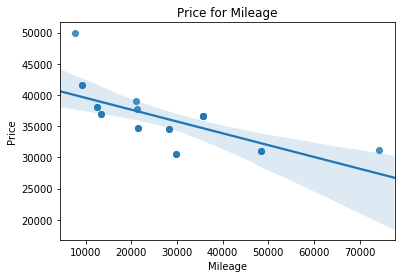

In [61]:
def set_name_type(data, column,new_col_name, index):
    def get_name_type(string):
        return string.strip().split()[index].lower()
    data[new_col_name] = data[column].apply(get_name_type)
    return data[new_col_name]

def set_makemodel_type(data, column, new_col_name, index):
    def get_makemodel_type(string):
        return ' '.join(string.strip().split()[index:])
    data[new_col_name] = data[column].apply(get_makemodel_type)
    return data[new_col_name]

df_a = df_m.copy()

set_name_type(df_a, 'Make and Model', 'maker_name', 1);
set_makemodel_type(df_a, 'Make and Model', 'model', 2)
df_a.head()

var1 = df_a[df_a['model'] == 'Sierra 1500 SLT']
ax = plt.subplot(111)
sns.regplot('mileage_int', 'price_int', data=var1, ax=ax)
plt.title('Price for Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show();
